# Proyecto 1 – Relación Minutos Ingreso
- David Leonardo Moreno Bedoya
- Jesus Santiago Amado Montaña
- Yodid Jair Cárdenas Rodríguez

In [1]:
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
df = pd.read_csv("Credito_dias.csv")

In [2]:
df.columns

Index(['totmou', 'totrev', 'creditcd', 'eqpdays', 'Customer_ID'], dtype='object')

### Variables a evaluar del Dataset **Relación de minutos**

#### **totrev**: Ingresos del cliente.

#### **totmou**: Total de minutos usados por el cliente.

#### **creditcd**: Indicador de tarjeta de crédito.

#### **eqpdays**: Número de días (antigüedad) del equipo actual.

#### Tratamiento de las variables del dataset

In [3]:
##tamanio de los datos
print(df.shape,"\n")

### cambiar los valores infinitos por nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)

### revisa si hay nulos
tnan = df.isna().any().any()
print(f"hay nulos? {tnan}\n")

### cuantos nulos hay
nanpcol = df.isna().sum()
print("Cuantos nan hay:")
print(nanpcol,"\n")

### cuantos infinitos hay
infpcol = df.isin([np.inf,-np.inf]).sum()
print("Cuantos infinitos hay:")
print(infpcol,"\n")

#traer aquellas que tienen nan
rwnan = df[df.isna().any(axis=1)]
print("filas con nan:")
print(rwnan,'\n')

### eliminando los  valores nulos
df.dropna(inplace=True)


(10000, 5) 

hay nulos? True

Cuantos nan hay:
totmou           0
totrev           0
creditcd       152
eqpdays          0
Customer_ID      0
dtype: int64 

Cuantos infinitos hay:
totmou         0
totrev         0
creditcd       0
eqpdays        0
Customer_ID    0
dtype: int64 

filas con nan:
       totmou   totrev creditcd  eqpdays  Customer_ID
44     5684.0   857.65      NaN      244      1072218
47      925.0   373.12      NaN      344      1066597
127   14466.0  2243.76      NaN      387      1023352
253    2504.0   756.79      NaN      495      1045521
427   76260.0  5526.11      NaN      361      1001813
...       ...      ...      ...      ...          ...
9428  15591.0  1330.71      NaN      447      1050795
9561   3011.0   522.14      NaN       74      1096985
9634    853.0   650.34      NaN      780      1025203
9783  33660.0  4247.85      NaN      206      1099258
9949   1955.0   606.08      NaN      770      1026149

[152 rows x 5 columns] 



In [4]:
print(df.head())
print(df.columns)
print(df.shape)

    totmou   totrev creditcd  eqpdays  Customer_ID
0   7269.0   906.58        Y      371      1082423
1  13552.0  1172.25        N       83      1069232
2   4152.0   577.39        Y      675      1031705
3   1863.0   294.26        Y      218      1089806
4   4155.0   433.16        N      222      1076695
Index(['totmou', 'totrev', 'creditcd', 'eqpdays', 'Customer_ID'], dtype='object')
(9848, 5)


### Analisis Exploratorio de cada una de las variables con sus respectivos histogramas y diagrama de barras.

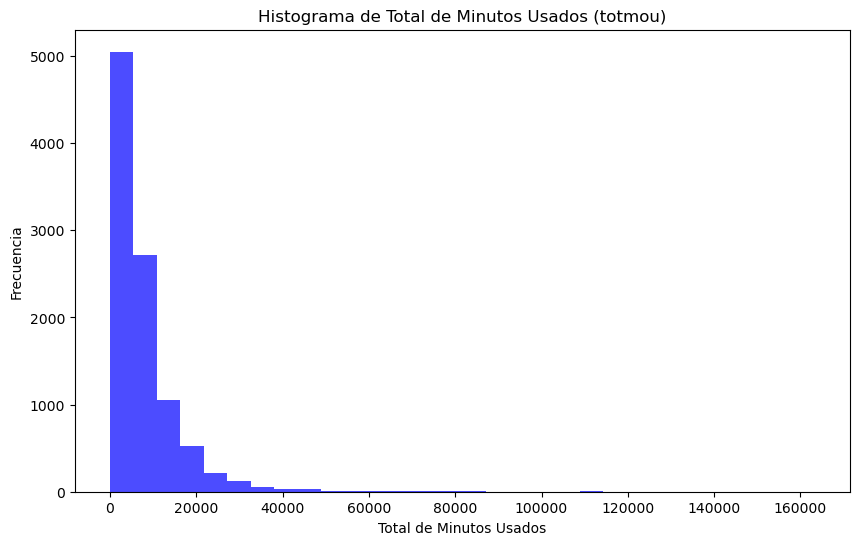

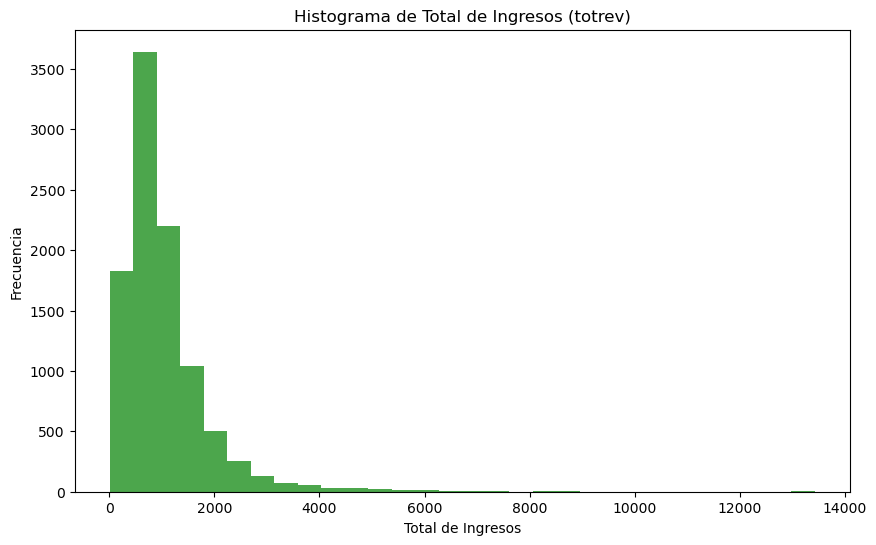

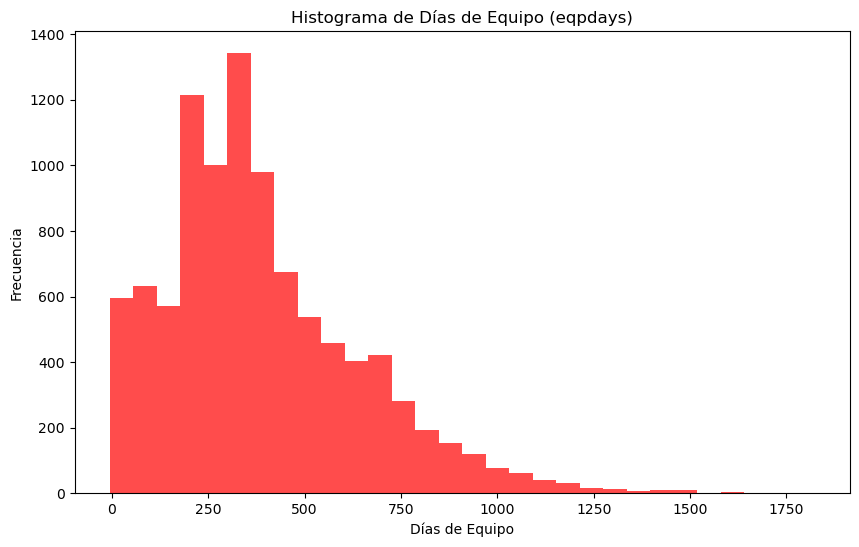

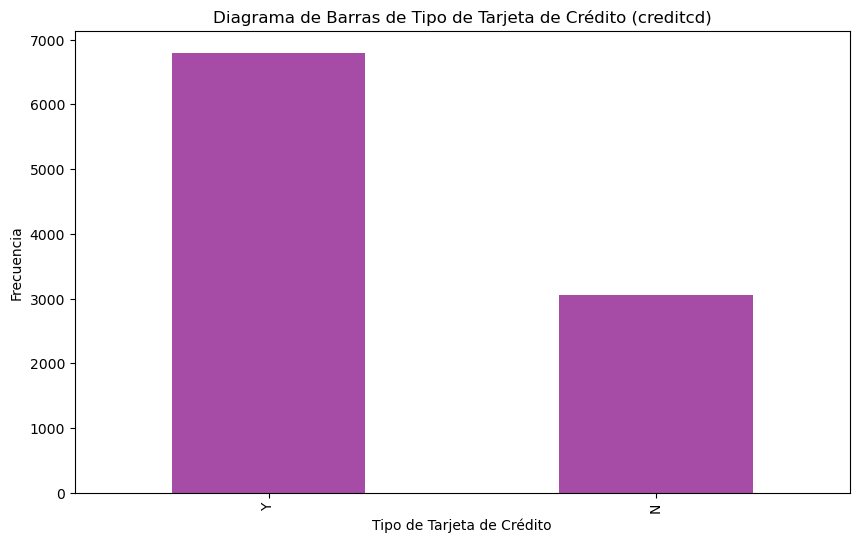

In [5]:
# Histograma para totmou
plt.figure(figsize=(10, 6))
plt.hist(df['totmou'], bins=30, color='blue', alpha=0.7)
plt.title('Histograma de Total de Minutos Usados (totmou)')
plt.xlabel('Total de Minutos Usados')
plt.ylabel('Frecuencia')
plt.show()

# Histograma para totrev
plt.figure(figsize=(10, 6))
plt.hist(df['totrev'], bins=30, color='green', alpha=0.7)
plt.title('Histograma de Total de Ingresos (totrev)')
plt.xlabel('Total de Ingresos')
plt.ylabel('Frecuencia')
plt.show()

# Histograma para eqpdays
plt.figure(figsize=(10, 6))
plt.hist(df['eqpdays'], bins=30, color='red', alpha=0.7)
plt.title('Histograma de Días de Equipo (eqpdays)')
plt.xlabel('Días de Equipo')
plt.ylabel('Frecuencia')
plt.show()
# Diagrama de barras para creditcd
plt.figure(figsize=(10, 6))
df['creditcd'].value_counts().plot(kind='bar', color='purple', alpha=0.7)
plt.title('Diagrama de Barras de Tipo de Tarjeta de Crédito (creditcd)')
plt.xlabel('Tipo de Tarjeta de Crédito')
plt.ylabel('Frecuencia')
plt.show()


Las gráficas anteriores muestran que las variables del Total de Minutos usados (totmou) y el total de ingresos (totrev) parecen tener distribuciones log normales.

### Diagrama de dispersión entre las variables **totrev** y **totmou**

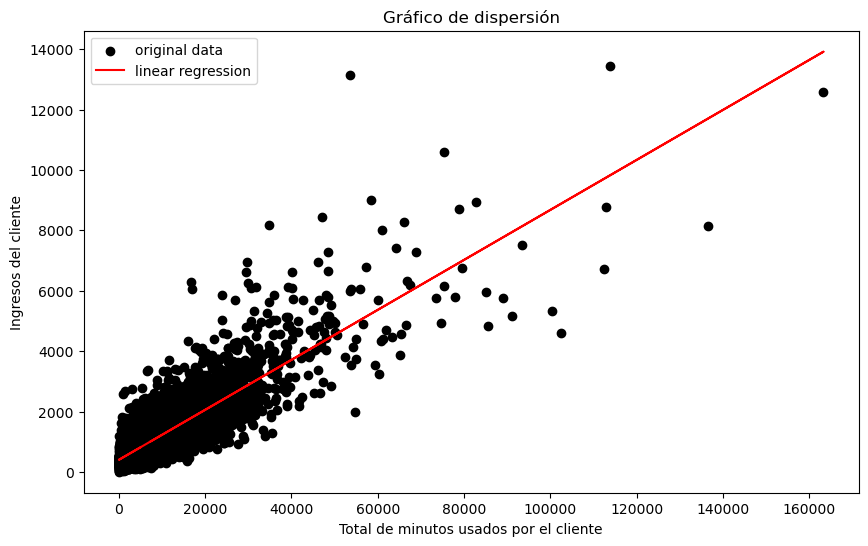

In [6]:
from sklearn import linear_model

### crea un modelo lineal entre las variables
### 
x = df['totmou'].values.reshape(-1, 1)
reg = linear_model.LinearRegression()
reg.fit(x,df['totrev'].values.reshape(-1, 1))
y = reg.predict(x)

### genera las gráficas
#print(reg.coef_)
plt.figure(figsize=(10,6))
plt.scatter(data=df,x='totmou',y='totrev',label='original data',color='black')
plt.title('Gráfico de dispersión')
plt.xlabel('Total de minutos usados por el cliente')
plt.ylabel('Ingresos del cliente')
plt.plot(x,y,label='linear regression',color='red')
plt.legend()
plt.show()

###  Conclusión: 
Se puede observar que hay una aparente relación lineal entre los datos de ingresos del cliente y el total de minutos usados por el cliente. Esto implica que podríamos usar un **modelo lineal** para hacer predicciones  de los ingresos del cliente con respecto al total de minutos usados por el cliente.  Esta afirmación es aparente y es necesario analizar el contexto de los datos para afianzar dicha conclusión.

**¿Existe relación alguna entre el total de minutos usados con la compañía y el ingreso total de los clientes?**
Hay una relación positiva significativa entre el uso de minutos y los ingresos. Esto podría implicar que los clientes que usan más minutos generan más ingresos para la empresa.

Este análisis puede sede gran ayuda l para estrategias comerciales y de marketing, indicando que incentivar el uso de minutos podría aumentar los ingresos.

### Analisis de correlación entre las variables **totrev** y **totmou**

In [7]:
correlation = df[['totmou', 'totrev']].corr()
print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
          totmou    totrev
totmou  1.000000  0.835279
totrev  0.835279  1.000000


### Grafico de correlación entre las variables **totrev** y **totmou**

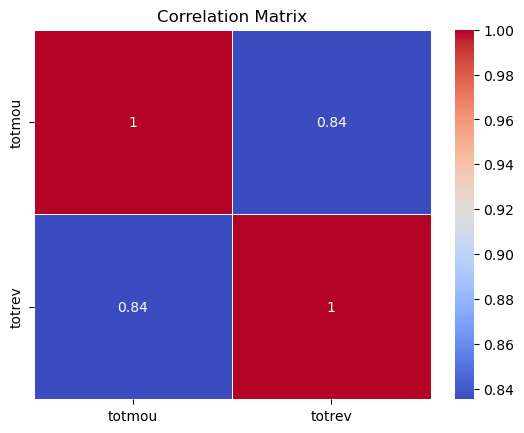

In [8]:
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Interpretación de la corrrelación
Correlación de totmou consigo mismo (1.000000): Correlación de totrev consigo mismo (1.000000): Esta correlacion igual a 1, lo que indica una correlación perfecta ya que cualquier variable está perfectamente correlacionada consigo misma.

Correlación entre **totmou** y **totrev** (0.835279):

La correlación es 0.835279, lo que indica una correlación positiva fuerte. Significa que, a medida que **totmou** (Total de minutos usados por el cliente) incrementa, **totrev** (Ingresos del cliente) también tiende a aumentar.

**Conclusión**
Las variables **totmou** y **totrev** tienen una relación fuerte y positiva. Es decir, más uso (totmou) está asociado con mayores ingresos (totrev).

Esto sugiere que hay una relación importante entre el uso y los ingresos, lo cual puede ser gran ayuda para tomar decisiones estratégicas.

In [9]:
df.describe()

,totmou,totrev,eqpdays,Customer_ID
count,9848.000000,9848.000000,9848.000000,9.848000e+03
mean,7697.900458,1042.302115,386.982433,1.049854e+06
std,8662.012934,857.945971,252.473800,2.875331e+04
min,0.000000,11.100000,-5.000000,1.000014e+06
25%,2575.000000,526.627500,210.000000,1.024992e+06
50%,5261.500000,820.955000,338.000000,1.049404e+06
75%,9842.000000,1272.975000,523.000000,1.074646e+06
max,163264.176700,13426.600000,1823.000000,1.099992e+06


In [10]:
df['totmou'].values

array([ 7269., 13552.,  4152., ...,  3690.,  3333.,  5025.])

In [11]:
df.columns

Index(['totmou', 'totrev', 'creditcd', 'eqpdays', 'Customer_ID'], dtype='object')

In [12]:
df.creditcd.unique()

array(['Y', 'N'], dtype=object)

#### A continuación se incluye la variable de crédito en la gráfica de dispersión

RMSE Sin tarjeta de crédito 460.8998698596665 Cantidad de datos => 3052
RMSE Con tarjeta de crédito 473.7217147899096 Cantidad de datos => 6796


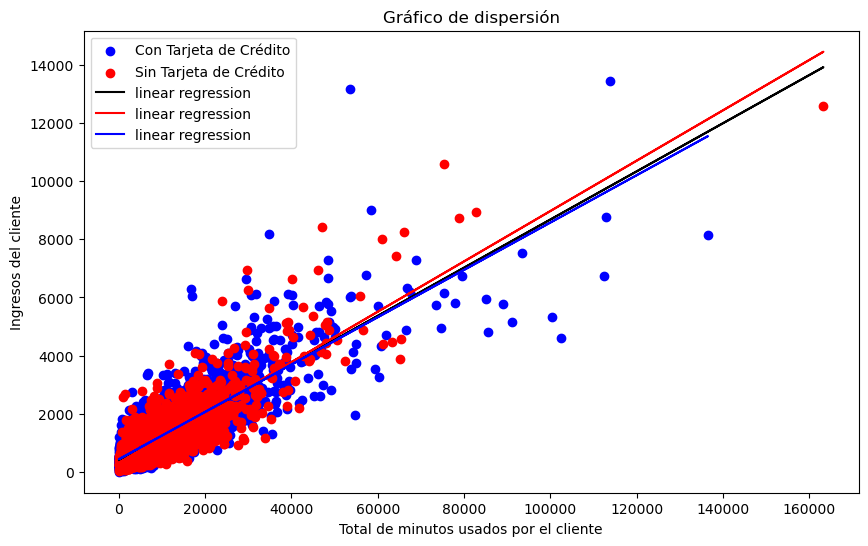

In [24]:
from sklearn.metrics import mean_squared_error

x1 = df[df['creditcd']=='N']['totmou'].values.reshape(-1, 1)
reg = linear_model.LinearRegression()
reg.fit(x1,df[df['creditcd']=='N']['totrev'].values.reshape(-1, 1))
y1 = reg.predict(x1)

x2 = df[df['creditcd']=='Y']['totmou'].values.reshape(-1, 1)
reg = linear_model.LinearRegression()
reg.fit(x2,df[df['creditcd']=='Y']['totrev'].values.reshape(-1, 1))
y2 = reg.predict(x2)


##### ERROR Cuadrático Medio de las estimaciones lineales con respecto a las predicciones
lin_rmsey1 = mean_squared_error(df[df['creditcd']=='N']['totrev'].values.reshape(-1, 1), y1)
print(f"RMSE Sin tarjeta de crédito {np.sqrt(lin_rmsey1)} Cantidad de datos => {len(df[df['creditcd']=='N'])}")

lin_rmsey2 = mean_squared_error(df[df['creditcd']=='Y']['totrev'].values.reshape(-1, 1), y2)
print(f"RMSE Con tarjeta de crédito {np.sqrt(lin_rmsey2)} Cantidad de datos => {len(df[df['creditcd']=='Y'])}")

#### 


plt.figure(figsize=(10,6))
plt.scatter(data=df[df['creditcd']=='Y'],x='totmou',y='totrev',label='Con Tarjeta de Crédito',color='blue')
plt.scatter(data=df[df['creditcd']=='N'],x='totmou',y='totrev',label='Sin Tarjeta de Crédito',color='red')
plt.title('Gráfico de dispersión')
plt.xlabel('Total de minutos usados por el cliente')
plt.ylabel('Ingresos del cliente')
plt.plot(x,y,label='linear regression',color='black')
plt.plot(x1,y1,label='linear regression',color='red')
plt.plot(x2,y2,label='linear regression',color='blue')
plt.legend()
plt.show()

**Conclusión:**

El hecho de NO tener tarjeta de crédito genera un modelo de predicción lineal un tanto más optimista en términos de ingresos para los clientes que cuando se tiene tarjeta de crédito.  Este último grupo hace unas predicciones un poco inferiores  con respecto a los ingresos, sin embargo, estas diferencias son mínimas, pueden considerarse casi despreciables.

Adicionalmente, podemos observar que la cantidad de datos con tarjeta de crédito dobla los que no tienen tarjeta de crédito y adicionalmente, la raíz del error cuadrático medio es menor para los datos de usuarios sin tarjeta de crédito y esto puede deberse a que hay mucha más información de los usuarios con tarjetas de crédito y a que los ingresos de dichos usuarios se muestran más dispersos como se observa en la gráfica anterior.